## EDA: Matplotlib and Seaborn ##

In this jupyter notebook we will perform Exploratory Data Analysis (EDA) on categorical and numerical columns from the three different transformed tables (product_tr.xlsx, patent_tr.xlsx and exclusivity_tr.xlsx). The analysis will be both, univariate and bivariate. The objective is to start answering the initial questions we have formulated as well as find new patterns and existing relationships between variables. For this aim, we will use two different python libraries for data visualization: matplotlib and seaborn.

In [70]:
#First we need to import the necessary libraries

import seaborn as sns  #library for data viz
import matplotlib.pyplot as plt #library for data viz
import pandas as pd #library for data manipulation and transfomation
pd.set_option("display.max_columns", None) #we configure pandas to display all columns from dataframe when needed.
import numpy as np #to perform calculations with numpy numbers. Just in case we need it.

In [71]:
#Now we need to load the whole dataset. We will start with the products table.

df_prod_tr = pd.read_excel("../1_Data/Data_Transformed/products_tr.xlsx")
display(df_prod_tr.head())

,Ingredient,Number_Of_Ingredients,Combination_Drug,Dosage_Form,Route,Trade_Name,Applicant,Appl_Type,Appl_No,Product_No,Approval_Date,Reference_Listed_Drug,Reference_Standard,Therapeutically_Equivalent,Type,Applicant_Full_Name
0,BUDESONIDE,1,No,"AEROSOL, FOAM",RECTAL,BUDESONIDE,PADAGIS ISRAEL,Generic,215328,1,2023-04-12,No,Yes,Yes,Prescription,PADAGIS ISRAEL PHARMACEUTICALS LTD
1,BUDESONIDE,1,No,"AEROSOL, FOAM",RECTAL,UCERIS,SALIX,Innovator,205613,1,2014-10-07,Yes,No,Yes,Prescription,SALIX PHARMACEUTICALS INC
2,MINOCYCLINE HYDROCHLORIDE,1,No,"AEROSOL, FOAM",TOPICAL,AMZEEQ,JOURNEY,Innovator,212379,1,2019-10-18,Yes,Yes,Not Rated,Prescription,JOURNEY MEDICAL CORP
3,AZELAIC ACID,1,No,"AEROSOL, FOAM",TOPICAL,AZELAIC ACID,TEVA PHARMS USA,Generic,210928,1,2020-10-07,No,No,Not Rated,Discontinued,TEVA PHARMACEUTICALS USA INC
4,BETAMETHASONE VALERATE,1,No,"AEROSOL, FOAM",TOPICAL,BETAMETHASONE VALERATE,ALEMBIC,Generic,215832,1,2024-08-22,No,No,Yes,Prescription,ALEMBIC PHARMACEUTICALS LTD


In [72]:
df_prod_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46050 entries, 0 to 46049
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Ingredient                  46050 non-null  object        
 1   Number_Of_Ingredients       46050 non-null  int64         
 2   Combination_Drug            46050 non-null  object        
 3   Dosage_Form                 46049 non-null  object        
 4   Route                       46015 non-null  object        
 5   Trade_Name                  46050 non-null  object        
 6   Applicant                   46050 non-null  object        
 7   Appl_Type                   46050 non-null  object        
 8   Appl_No                     46050 non-null  int64         
 9   Product_No                  46050 non-null  int64         
 10  Approval_Date               46050 non-null  datetime64[ns]
 11  Reference_Listed_Drug       46050 non-null  object    

### Univariate analysis of categorical columns ###

In [73]:
#First of all, we will create a dataframe just with categorical columns.

df_prod_tr_cat = df_prod_tr.select_dtypes(include='object') #the function select_dtypes returns a filtered df.
df_prod_tr_cat.head()

,Ingredient,Combination_Drug,Dosage_Form,Route,Trade_Name,Applicant,Appl_Type,Reference_Listed_Drug,Reference_Standard,Therapeutically_Equivalent,Type,Applicant_Full_Name
0,BUDESONIDE,No,"AEROSOL, FOAM",RECTAL,BUDESONIDE,PADAGIS ISRAEL,Generic,No,Yes,Yes,Prescription,PADAGIS ISRAEL PHARMACEUTICALS LTD
1,BUDESONIDE,No,"AEROSOL, FOAM",RECTAL,UCERIS,SALIX,Innovator,Yes,No,Yes,Prescription,SALIX PHARMACEUTICALS INC
2,MINOCYCLINE HYDROCHLORIDE,No,"AEROSOL, FOAM",TOPICAL,AMZEEQ,JOURNEY,Innovator,Yes,Yes,Not Rated,Prescription,JOURNEY MEDICAL CORP
3,AZELAIC ACID,No,"AEROSOL, FOAM",TOPICAL,AZELAIC ACID,TEVA PHARMS USA,Generic,No,No,Not Rated,Discontinued,TEVA PHARMACEUTICALS USA INC
4,BETAMETHASONE VALERATE,No,"AEROSOL, FOAM",TOPICAL,BETAMETHASONE VALERATE,ALEMBIC,Generic,No,No,Yes,Prescription,ALEMBIC PHARMACEUTICALS LTD


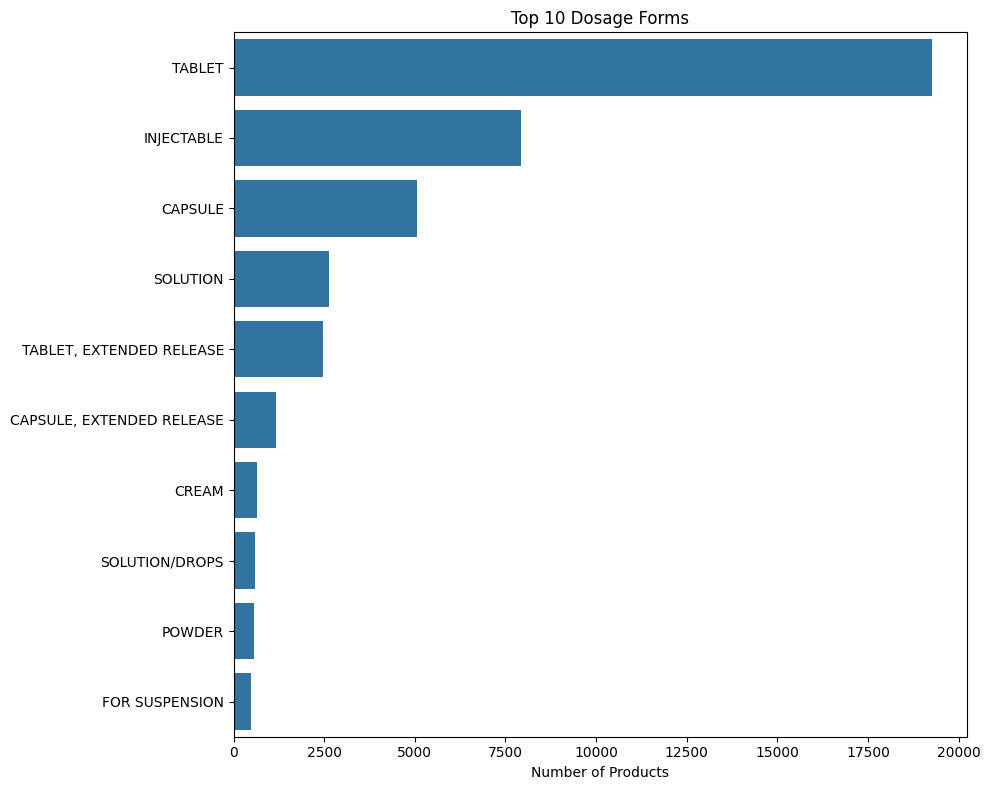

In [74]:
#Univariate analysis of Dosage_Form

# First we need to order the x axis and extract a top 10 to limit the number of categories to be displayed in the countplot.

order = df_prod_tr_cat['Dosage_Form'].value_counts().nlargest(10).index #with value_counts, categories are ordered by count. Then we extract the top 10 and finally we extract the index to obtain a list with the top 10 ordered categories.

plt.figure(figsize=(10,8)) #it is a good practice to first create a figure with the correct size.
sns.countplot(data=df_prod_tr_cat,y='Dosage_Form', order=order) #here we apply the order we have previously defined.
plt.title('Top 10 Dosage Forms')
plt.xlabel('Number of Products')
plt.ylabel(None)
plt.tight_layout()
plt.show()

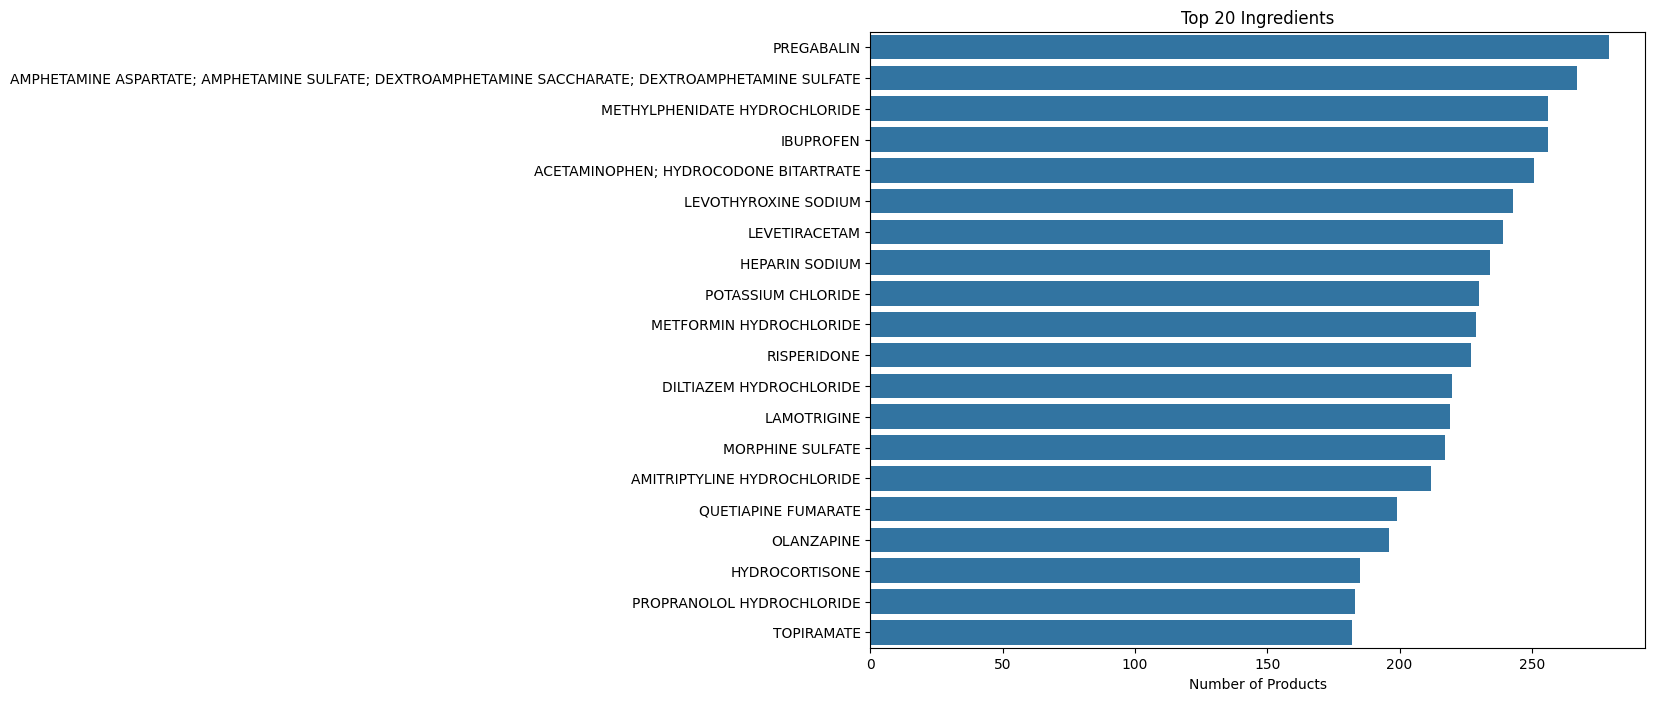

In [75]:
##Univariate analysis of Ingredient

order = df_prod_tr_cat['Ingredient'].value_counts().nlargest(20).index #with value_counts, categories are ordered by count. Then we extract the top 20 and finally we extract the index to obtain a list with the top 20 ordered categories.

plt.figure(figsize=(10,8)) #it is a good practice to first create a figure with the correct size.
sns.countplot(data=df_prod_tr_cat,y='Ingredient', order=order) #here we apply the order we have previously defined.
plt.title('Top 20 Ingredients')
plt.xlabel('Number of Products')
plt.ylabel(None)
plt.show()

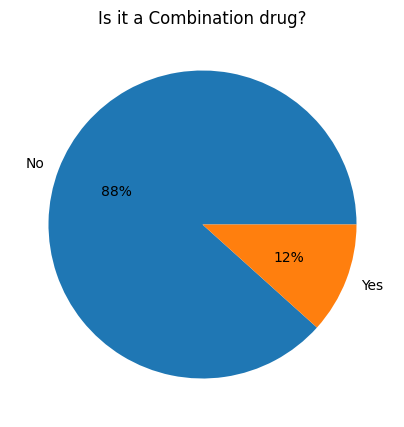

In [76]:
#Univariate analysis for Combination_Drug

data = df_prod_tr_cat['Combination_Drug'].value_counts()  #to build a pie plot in matplotlib we need to extract value counts
labels = df_prod_tr_cat['Combination_Drug'].value_counts().index #and we need also the labels of each category.
plt.figure(figsize=(5,5))
plt.pie(data, labels = labels, autopct='%1.0f%%') #autopct for auto-calculating percentage of each group.
plt.title('Is it a Combination drug?')
plt.show()

In [77]:
#Univariate analysis for Route
df_prod_tr_cat['Route'].value_counts()

Route
ORAL                                            31435
INJECTION                                        7162
TOPICAL                                          1797
INTRAVENOUS                                      1685
OPHTHALMIC                                        786
                                                ...  
INTRA-ARTICULAR                                     1
ENDOCERVICAL                                        1
INTRA-ARTICULAR, INTRAMUSCULAR, INTRAVITREAL        1
INTRACAMERAL                                        1
PERFUSION, BILIARY                                  1
Name: count, Length: 78, dtype: int64

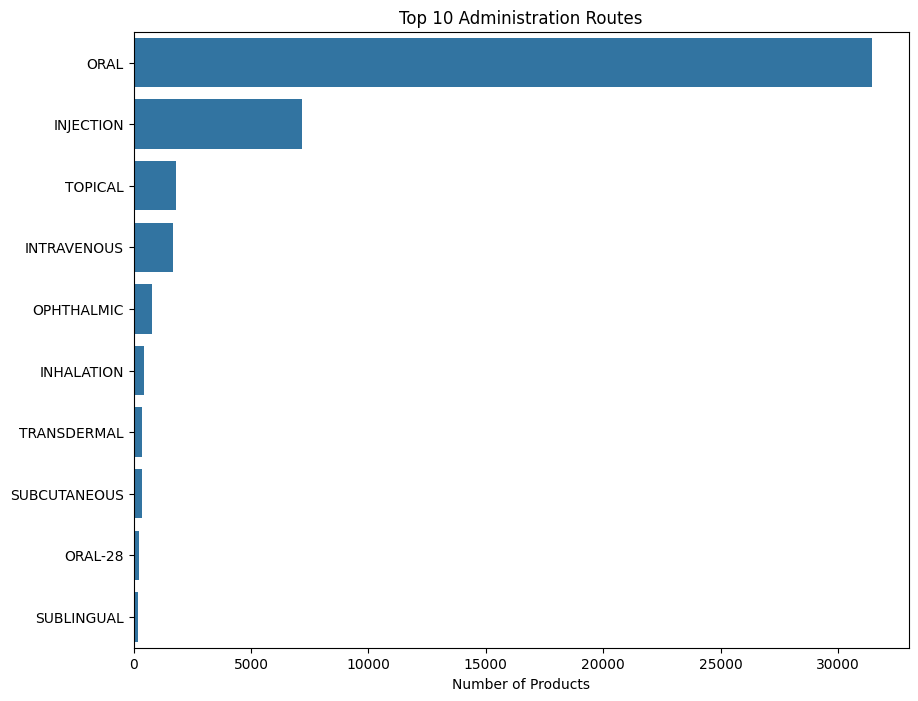

In [78]:
order = df_prod_tr_cat['Route'].value_counts().nlargest(10).index #with value_counts, categories are ordered by count. Then we extract the top 10 and finally we extract the index to obtain a list with the top 10 ordered categories.

plt.figure(figsize=(10,8)) #it is a good practice to first create a figure with the correct size.
sns.countplot(data=df_prod_tr_cat,y='Route', order=order) #here we apply the order we have previously defined.
plt.title('Top 10 Administration Routes')
plt.xlabel('Number of Products')
plt.ylabel(None)
plt.show()

In [79]:
#Lets check how many products were tagged with the administration route "ORAL-28".

df_prod_tr_cat['Route'][df_prod_tr_cat['Route']=='ORAL-28'].value_counts()

Route
ORAL-28    232
Name: count, dtype: int64

In [80]:
#We decided to include these products inside the ORAL category. Therefore, we need to perform further transformations:

df_prod_tr['Route'] = df_prod_tr['Route'].str.replace('ORAL-28','ORAL')
df_prod_tr_cat['Route'] = df_prod_tr_cat['Route'].str.replace('ORAL-28','ORAL')

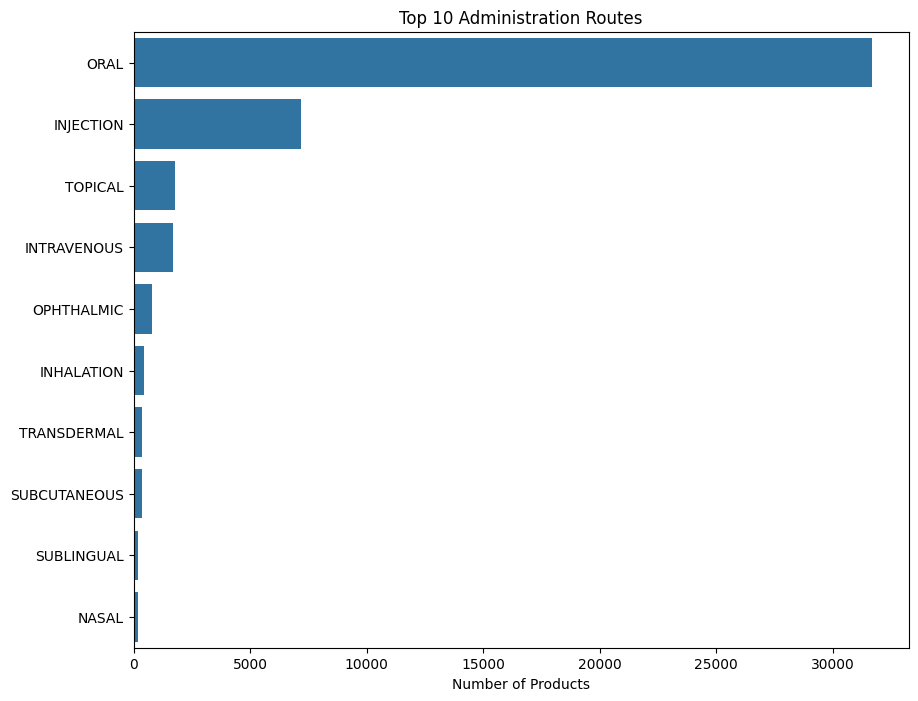

In [81]:
#Let's generate the countplot again...

order = df_prod_tr_cat['Route'].value_counts().nlargest(10).index #with value_counts, categories are ordered by count. Then we extract the top 10 and finally we extract the index to obtain a list with the top 10 ordered categories.

plt.figure(figsize=(10,8)) #it is a good practice to first create a figure with the correct size.
sns.countplot(data=df_prod_tr_cat,y='Route', order=order) #here we apply the order we have previously defined.
plt.title('Top 10 Administration Routes')
plt.xlabel('Number of Products')
plt.ylabel(None)
plt.show()

In [82]:
#Univariate analysis for Trade_Name.

df_prod_tr_cat['Trade_Name'].value_counts()

Trade_Name
PREGABALIN                                                                267
DEXTROAMP SACCHARATE, AMP ASPARTATE, DEXTROAMP SULFATE AND AMP SULFATE    244
HYDROCODONE BITARTRATE AND ACETAMINOPHEN                                  221
METFORMIN HYDROCHLORIDE                                                   216
LEVETIRACETAM                                                             200
                                                                         ... 
CHLOROPTIC                                                                  1
COMBIGAN                                                                    1
COSOPT                                                                      1
COSOPT PF                                                                   1
NYSTAFORM                                                                   1
Name: count, Length: 7400, dtype: int64

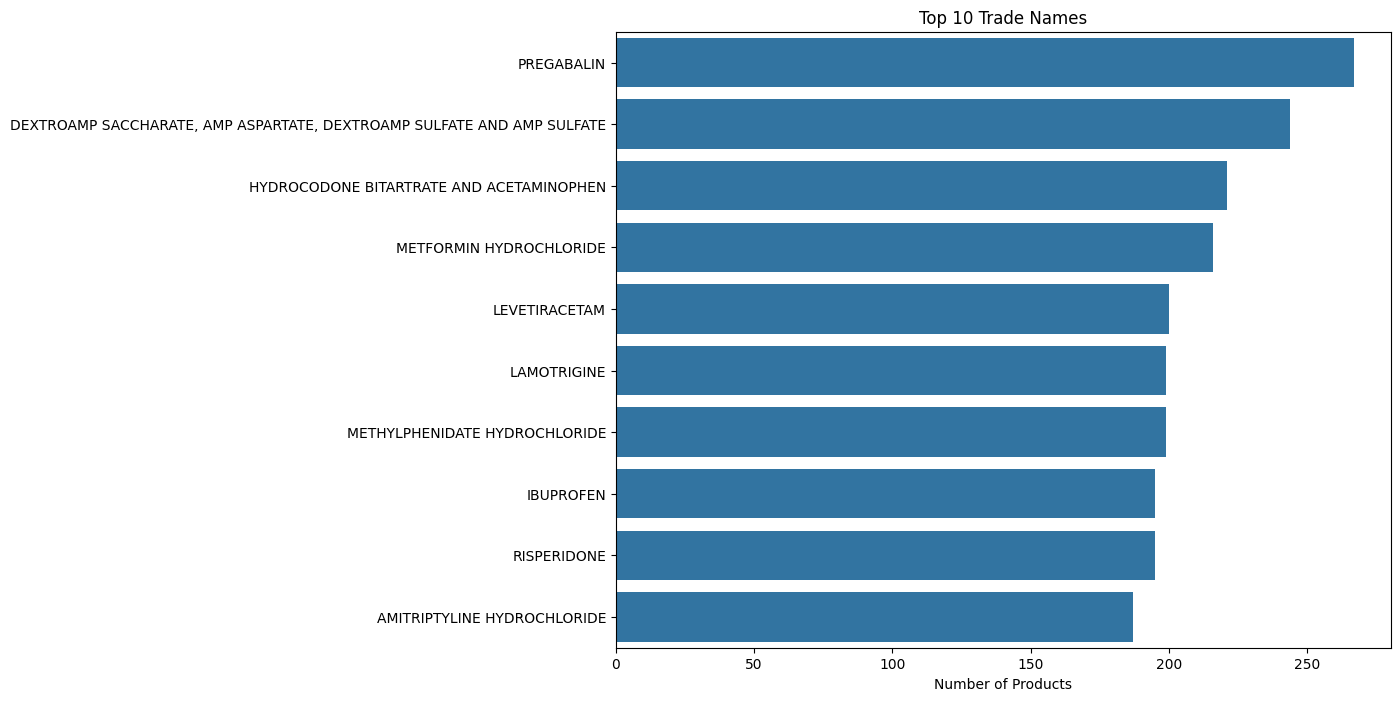

In [83]:
order = df_prod_tr_cat['Trade_Name'].value_counts().nlargest(10).index #with value_counts, categories are ordered by count. Then we extract the top 10 and finally we extract the index to obtain a list with the top 10 ordered categories.

plt.figure(figsize=(10,8)) #it is a good practice to first create a figure with the correct size.
sns.countplot(data=df_prod_tr_cat,y='Trade_Name', order=order) #here we apply the order we have previously defined.
plt.title('Top 10 Trade Names')
plt.xlabel('Number of Products')
plt.ylabel(None)
plt.show()

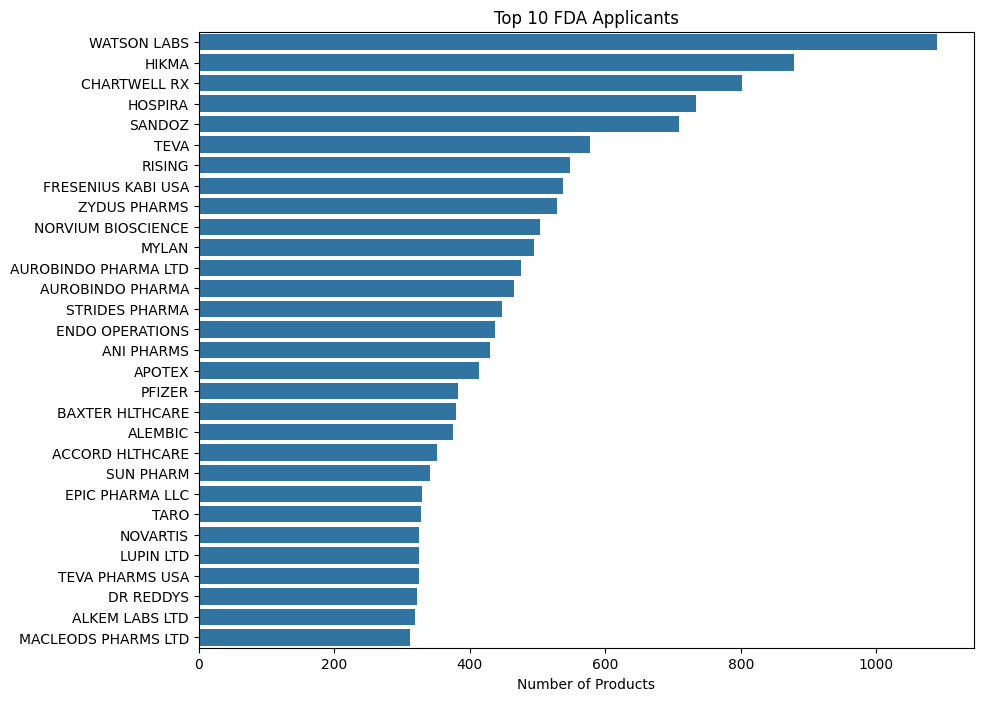

In [84]:
#Univariate analysis for Applicant.

order = df_prod_tr_cat['Applicant'].value_counts().nlargest(30).index #with value_counts, categories are ordered by count. Then we extract the top 10 and finally we extract the index to obtain a list with the top 10 ordered categories.

plt.figure(figsize=(10,8)) #it is a good practice to first create a figure with the correct size.
sns.countplot(data=df_prod_tr_cat,y='Applicant', order=order) #here we apply the order we have previously defined.
plt.title('Top 10 FDA Applicants')
plt.xlabel('Number of Products')
plt.ylabel(None)
plt.show()

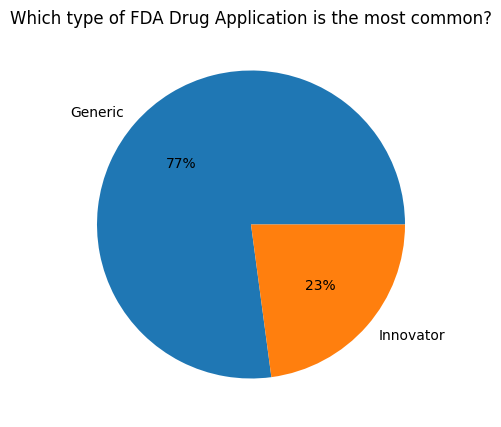

In [87]:
#Univariate analysis for Appl_Type

data = df_prod_tr_cat['Appl_Type'].value_counts()  #to build a pie plot in matplotlib we need to extract value counts
labels = df_prod_tr_cat['Appl_Type'].value_counts().index #and we need also the labels of each category.
plt.figure(figsize=(5,5))
plt.pie(data, labels = labels, autopct='%1.0f%%') #autopct for auto-calculating percentage of each group.
plt.title('Which type of FDA Drug Application is the most common?')
plt.show()